<a href="https://colab.research.google.com/github/yaramahmoudd11/credit-scoring-ml/blob/main/credit_scoring_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install -q seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("german_credit_data_full.csv")
df.head()


Saving german_credit_data_full.csv to german_credit_data_full (1).csv


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,56,male,0,free,quite rich,moderate,14948,46,radio/TV,good
1,69,male,1,rent,NaN,none,15086,42,furniture,bad
2,46,male,3,own,NaN,little,2314,64,vacation,good
3,32,female,0,own,NaN,rich,13501,45,repairs,bad
4,60,male,3,own,quite rich,none,17990,21,repairs,bad


In [20]:
data = df.copy()

data['Risk'] = data['Risk'].map({'good': 1, 'bad': 0})

cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

data.head()


,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_none,Checking account_rich,Purpose_car,Purpose_education,Purpose_furniture,Purpose_radio/TV,Purpose_repairs,Purpose_vacation
0,56,0,14948,46,1,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False
1,69,1,15086,42,0,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False
2,46,3,2314,64,1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,32,0,13501,45,0,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
4,60,3,17990,21,0,True,True,False,False,True,False,False,True,False,False,False,False,False,True,False


In [21]:
from sklearn.preprocessing import StandardScaler

X = data.drop('Risk', axis=1)
y = data['Risk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


Training Samples: 800
Testing Samples: 200


In [23]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


y_pred_log = log_model.predict(X_test)


In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("🔹 Logistic Regression")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print("\n🔸 Decision Tree")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.17      0.02      0.03        64
           1       0.68      0.96      0.79       136

    accuracy                           0.66       200
   macro avg       0.42      0.49      0.41       200
weighted avg       0.51      0.66      0.55       200

ROC-AUC: 0.48943014705882354
Confusion Matrix:
 [[  1  63]
 [  5 131]]

🔸 Decision Tree
              precision    recall  f1-score   support

           0       0.38      0.41      0.39        64
           1       0.71      0.68      0.70       136

    accuracy                           0.59       200
   macro avg       0.54      0.55      0.54       200
weighted avg       0.60      0.59      0.60       200

ROC-AUC: 0.5450367647058824
Confusion Matrix:
 [[26 38]
 [43 93]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("🔹 Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔹 Random Forest Results
              precision    recall  f1-score   support

           0       0.45      0.08      0.13        64
           1       0.69      0.96      0.80       136

    accuracy                           0.68       200
   macro avg       0.57      0.52      0.47       200
weighted avg       0.61      0.68      0.59       200

ROC-AUC: 0.5170036764705883
Confusion Matrix:
 [[  5  59]
 [  6 130]]


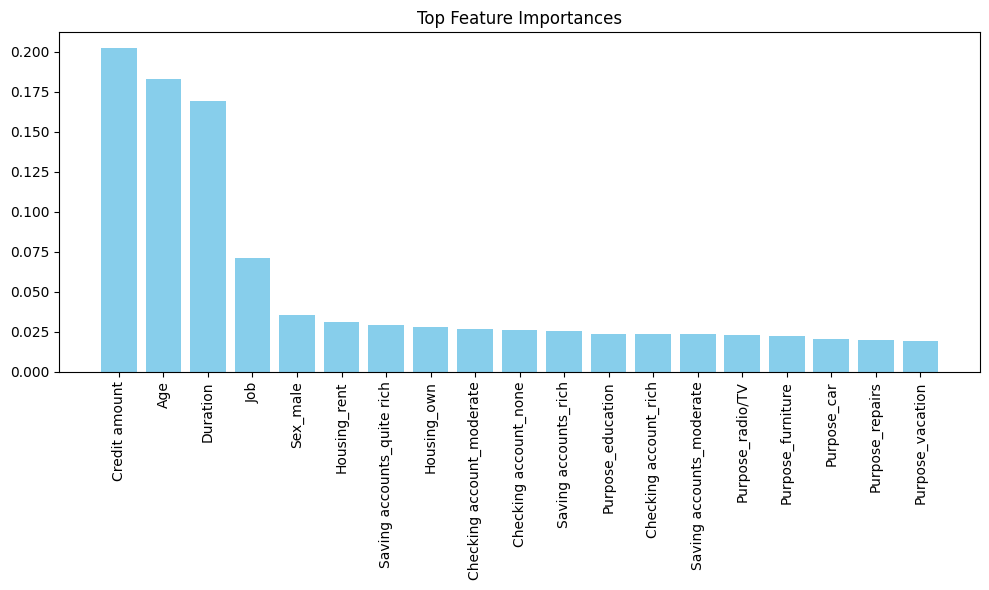

In [29]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
